<a href="https://colab.research.google.com/github/its-Ravi-Singh/RL_Projs/blob/main/warehouse_env.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import numpy as np
from gymnasium import spaces
import matplotlib.pyplot as plt

In [ ]:
class WarehouseEnv:
    def __init__(self, grid_size=6, stochastic=False, max_steps=200): # Set default values like gridsize = 6 * 6, stochastic=False, max_steps=200
        self.grid_size = grid_size
        self.stochastic = stochastic
        self.max_steps = max_steps

        # Actions
        self.actions = ["UP", "DOWN", "LEFT", "RIGHT", "PICK-UP", "DROP"]
        self.n_actions = len(self.actions)

        # Scenario like Pickup, DropOff and obstacles location in the grid
        self.pickup_loc = (0, 0)
        self.drop_loc = (4, 5)
        self.obstacles = [(2, 2), (2, 3), (3, 2), (3, 5), (4, 4)]

        self.action_space = spaces.Discrete(self.n_actions)
        self.observation_space = spaces.MultiDiscrete([self.grid_size, self.grid_size, 2])

        self.reset()

    def _get_obs(self):
        return (tuple(self.agent_loc), self.carrying) # returns agents status[location and carring status]

    def reset(self, seed=1): # default seed 1
        random.seed(seed)
        np.random.seed(seed)

        self.agent_loc = [0, self.grid_size - 1]  # default start: top-right
        self.carrying = False
        self.steps = 0
        return self._get_obs()

    def step(self, action):
        self.steps += 1
        reward = -1
        done = False
        truncated = False
        info = {}

        move = self.actions[action]

        # Stochasticity: 10% chance to stay for movement actions
        if self.stochastic and move in ["UP", "DOWN", "LEFT", "RIGHT"]:
            if random.random() < 0.1:
                move = "STAY"

        new_pos = self.agent_loc.copy()

        # Movements action for robot
        if move == "UP":
            new_pos[0] -= 1
        elif move == "DOWN":
            new_pos[0] += 1
        elif move == "LEFT":
            new_pos[1] -= 1
        elif move == "RIGHT":
            new_pos[1] += 1

        # Apply movement if valid
        if move in ["UP", "DOWN", "LEFT", "RIGHT"]:
            if 0 <= new_pos[0] < self.grid_size and 0 <= new_pos[1] < self.grid_size:
                if tuple(new_pos) not in self.obstacles:
                    self.agent_loc = new_pos
                else:
                    reward -= 20  # obstacle penalty
                    info["collision"] = True
            else:
                info["hit_wall"] = True

        # Pickup
        if move == "PICK-UP":
            if tuple(self.agent_loc) == self.pickup_loc and not self.carrying:
                self.carrying = True
                reward += 25
                info["picked_up"] = True

        # Drop
        if move == "DROP":
            if tuple(self.agent_loc) == self.drop_loc and self.carrying:
                reward += 100
                done = True
                info["delivered"] = True

        # Truncation condition (time limit)
        if self.steps >= self.max_steps and not done:
            truncated = True

        obs = self._get_obs()

        return obs, reward, done


    def render(self):

        mat = np.zeros((self.grid_size, self.grid_size), dtype=int)
        # legend:
        # 0 empty, 1 obstacle, 2 pickup, 3 drop, 4 robot
        for (r, c) in self.obstacles:
            mat[r, c] = 1
        pr, pc = self.pickup_loc
        dr, dc = self.drop_loc
        mat[pr, pc] = 2
        mat[dr, dc] = 3
        rr, rc = self.agent_loc
        mat[rr, rc] = 4
        plt.figure()
        plt.imshow(mat)
        plt.title(f"Warehouse (carrying={self.carrying}, steps={self.steps})")
        plt.xticks(range(self.grid_size))
        plt.yticks(range(self.grid_size))
        plt.grid(True)
        plt.show()

Step: 0
State: ((1, 5), False)
Action: DOWN
Reward: -1


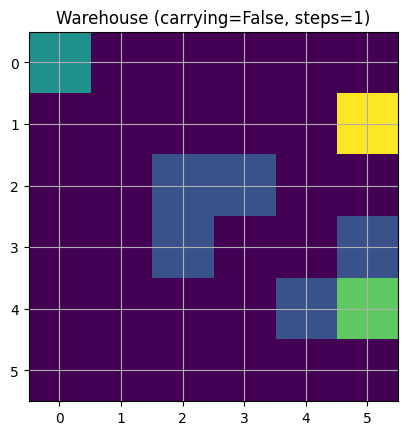

Step: 1
State: ((1, 5), False)
Action: PICK-UP
Reward: -1


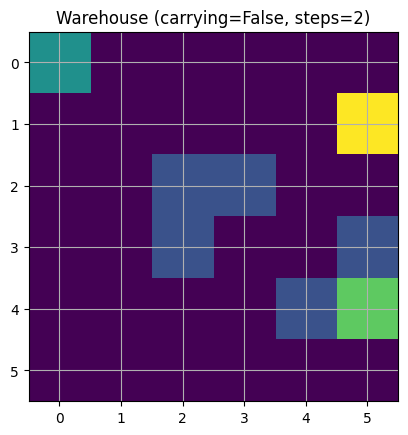

Step: 2
State: ((0, 5), False)
Action: UP
Reward: -1


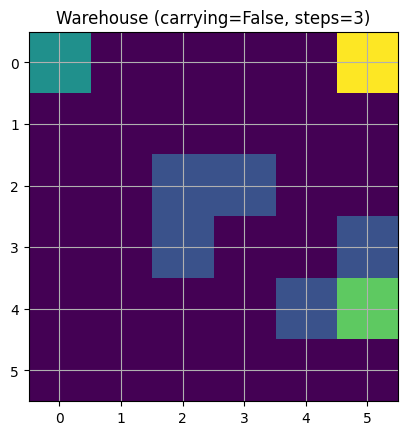

Step: 3
State: ((0, 4), False)
Action: LEFT
Reward: -1


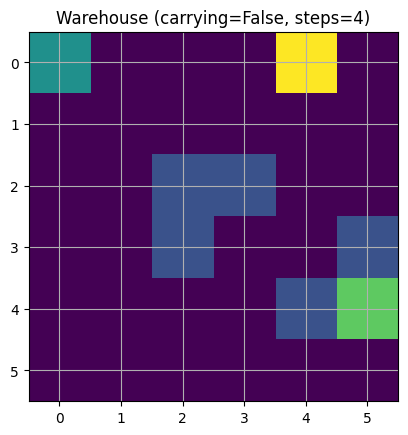

Step: 4
State: ((0, 4), False)
Action: UP
Reward: -1


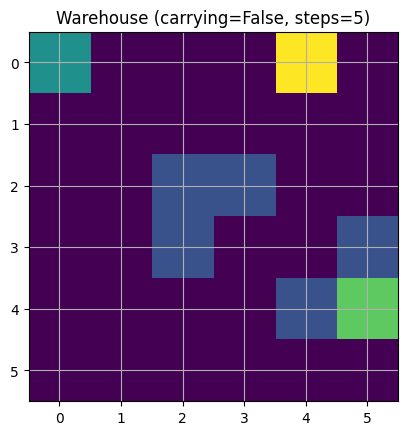

Step: 5
State: ((0, 5), False)
Action: RIGHT
Reward: -1


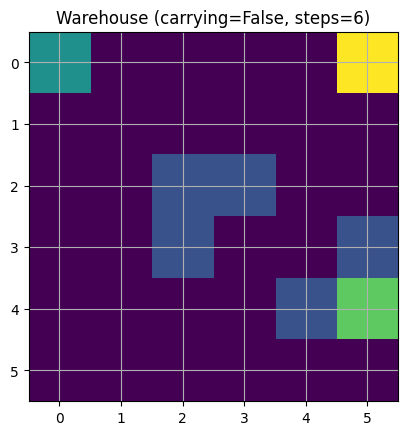

Step: 6
State: ((0, 5), False)
Action: RIGHT
Reward: -1


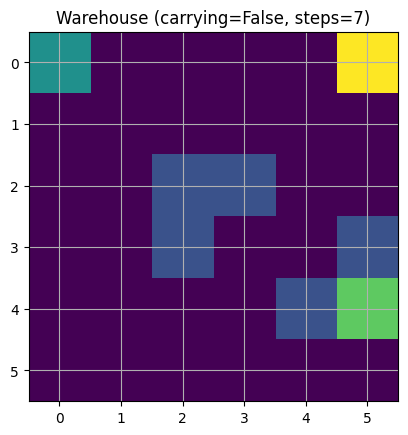

Step: 7
State: ((0, 5), False)
Action: RIGHT
Reward: -1


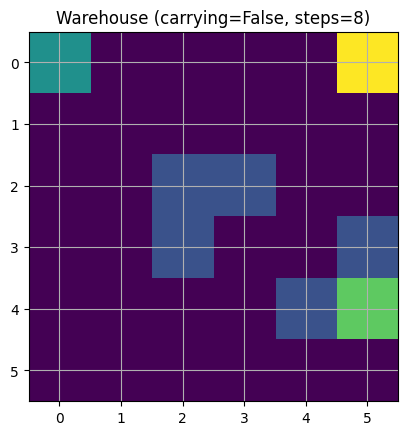

Step: 8
State: ((0, 5), False)
Action: DROP
Reward: -1


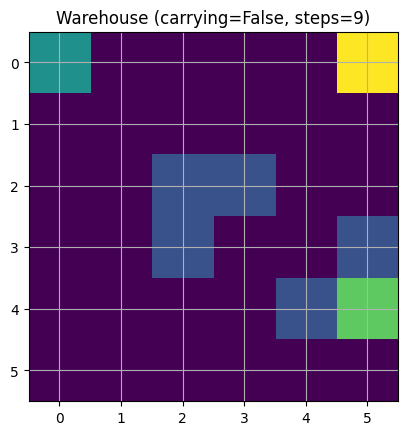

Step: 9
State: ((0, 5), False)
Action: RIGHT
Reward: -1


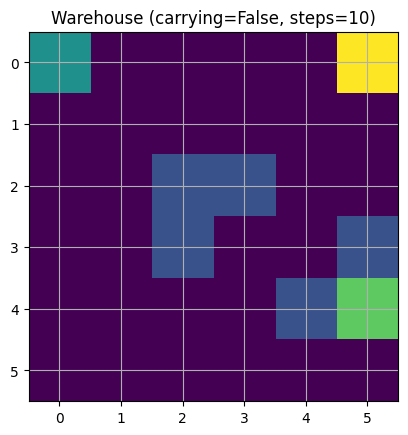

In [ ]:
# Quick random rollout (10 steps)
if __name__ == "__main__":
    env = WarehouseEnv(grid_size=6, stochastic=False)
    state = env.reset()

    for t in range(10):
        action = random.randint(0, 5)
        state, reward, done = env.step(action)

        print("Step:", t)
        print("State:", state)
        print("Action:", env.actions[action])
        print("Reward:", reward)
        env.render()

        if done:
            print("Delivered!")
            break